In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
rfm = pd.read_csv(r"/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/rfm_data.csv")


In [3]:
#Feature Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


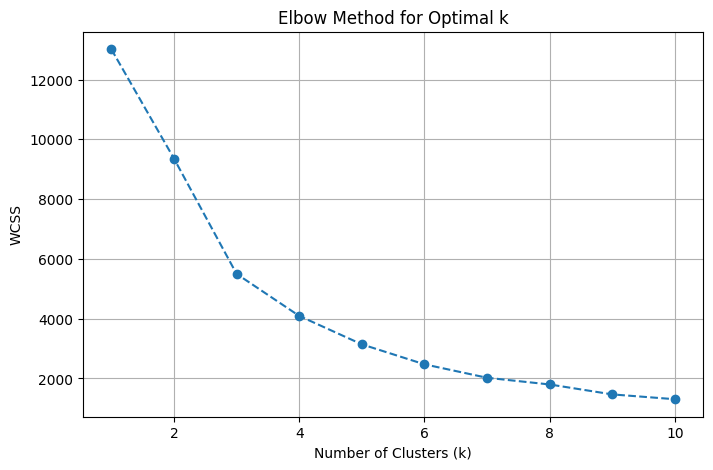

In [4]:
#Elbow Method to Choose k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [5]:
#Apply KMeans (using k=5 based on Elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [6]:
#Analyze Clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)
print(cluster_summary)

        Recency Frequency   Monetary      
           mean      mean       mean count
Cluster                                   
0         43.81      3.69    1358.77  3060
1        248.47      1.55     480.42  1063
2          1.50    135.83   58381.12     6
3         15.72     22.30   13534.00   203
4          7.67     42.83  190863.46     6


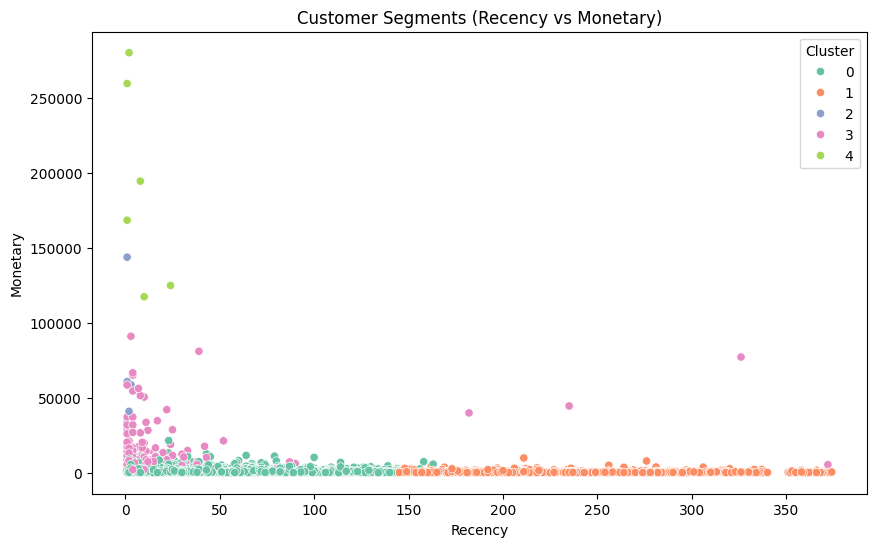

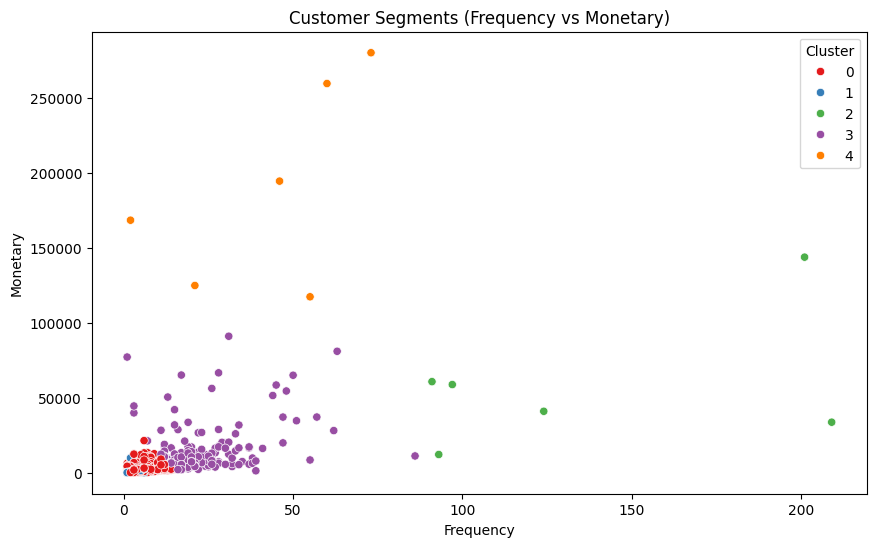

In [7]:
#Visualize Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set2')
plt.title('Customer Segments (Recency vs Monetary)')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title('Customer Segments (Frequency vs Monetary)')
plt.show()

In [8]:
clustered_path = "/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/clustered_customers.csv"
rfm.to_csv(clustered_path, index=False)
print(f"Clustered customer data saved to {clustered_path}")


Clustered customer data saved to /Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/clustered_customers.csv
